In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchlensmaker as tlm

rays aperture 0.0
rays aperture 1.7949524
rays aperture 0.0


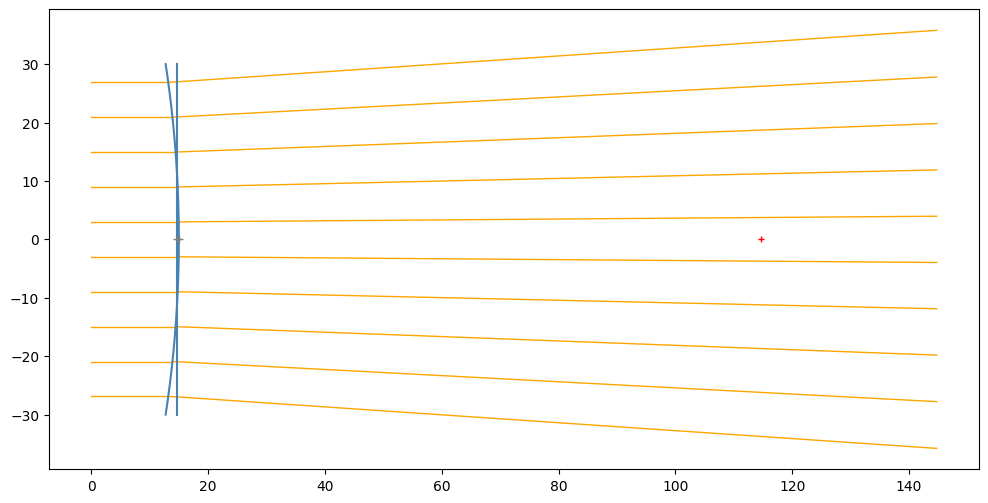

[  0/250] L= 461.519 | grad norm= 38028.828125
[ 13/250] L= 107.506 | grad norm= 18489.88671875


[ 26/250] L=  0.449 | grad norm= 1118.8768310546875
[ 39/250] L=  8.486 | grad norm= 6413.50341796875


[ 52/250] L=  0.305 | grad norm= 829.7919311523438
[ 65/250] L=  0.726 | grad norm= 1549.6470947265625


[ 78/250] L=  0.158 | grad norm= 178.65037536621094
[ 91/250] L=  0.193 | grad norm= 435.3743591308594


[104/250] L=  0.151 | grad norm= 46.163394927978516
[117/250] L=  0.153 | grad norm= 98.61894226074219


[130/250] L=  0.151 | grad norm= 45.008731842041016
[143/250] L=  0.151 | grad norm= 7.390583038330078


[156/250] L=  0.151 | grad norm= 14.66568374633789
[169/250] L=  0.151 | grad norm= 5.319774627685547


[182/250] L=  0.151 | grad norm= 0.8564109802246094
[195/250] L=  0.151 | grad norm= 1.8201408386230469


[208/250] L=  0.151 | grad norm= 0.8924674987792969
[221/250] L=  0.151 | grad norm= 0.11991500854492188


[234/250] L=  0.151 | grad norm= 0.1405792236328125
[247/250] L=  0.151 | grad norm= 0.13193130493164062


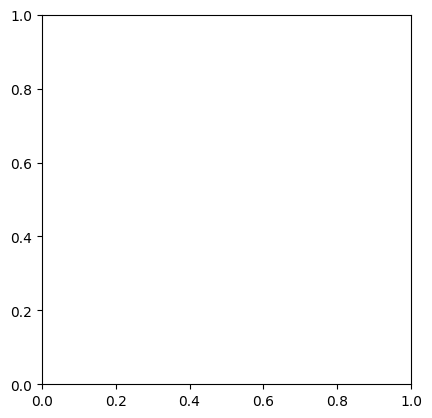

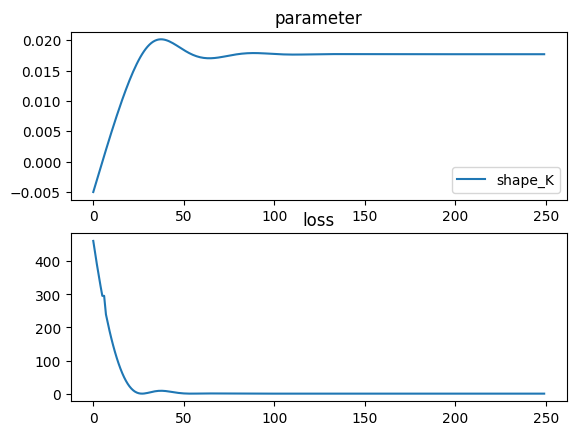

rays aperture 0.0
rays aperture 6.7369957
rays aperture 0.0


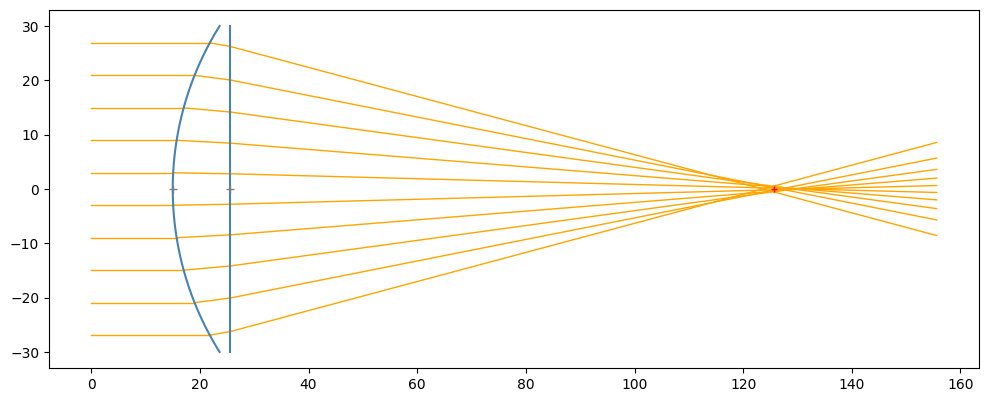

In [2]:
lens_diameter = 60. # lens diameter in mm

class Optics(tlm.Module):
    def __init__(self):
        super().__init__()
        
        self.shape = tlm.CircularArc(lens_diameter, nn.Parameter(torch.tensor(-200.)))

        self.lens = tlm.PlanoLens(self.shape, (1.0, 1.5), outer_thickness=2.0)

        self.optics = tlm.OpticalSequence(
            tlm.PointSourceAtInfinity(beam_diameter=0.9*lens_diameter),
            tlm.Gap(15.),
            
            self.lens,
            
            tlm.Gap(100.0), # focal length
            tlm.FocalPoint(),
        )

    def forward(self, inputs, sampling):
        return self.optics(inputs, sampling)

optics = Optics()


tlm.render_plt(optics)

tlm.optimize(
    optics,
    optimizer = optim.Adam(optics.parameters(), lr=1e-3),
    sampling = {"rays": 10},
    num_iter = 250
)

tlm.render_plt(optics)

In [3]:
part = tlm.lens_to_part(optics.lens)
part

8.624557495117188 29.999996185302734 56.48884582519531


Part at 0x7895ef57e870, label(), #children(0)